 # Customer Churn Prediction for GNB Bank

## 1. Business Understanding:

For GNB Bank, understanding and predicting customer churn is critical for several reasons. First and foremost, customer churn impacts the bank's revenue and profitability. Acquiring new customers is more expensive than retaining existing ones, so preventing churn can lead to significant cost savings. Moreover, customer retention contributes to a positive reputation and strengthens the bank's position in the highly competitive financial industry. By leveraging machine learning techniques to predict customer churn, GNB Bank can proactively address the needs of at-risk customers, personalize their banking experience, and develop targeted marketing campaigns to foster long-term customer loyalty.

## a) Introduction:

GNB Bank is a leading financial institution, providing various banking and financial services to its customers. As with any bank, customer retention is crucial for maintaining a strong market presence and sustaining profitability. Identifying customers who are likely to churn is of paramount importance for GNB Bank to implement targeted strategies and retain valuable customers. In this bprojec, we will explore a dataset containing customer information, including demographics, banking behavior, and historical churn data. Our objective is to build a predictive model that can accurately predict customer churn and provide valuable insights to help GNB Bank enhance its customer retention efforts.

## b) Problem statement
GNB Bank is in constant worry of whether the customer will churn or not. This problem has lead to them unable to make stable and precise decision on the customers that visit, additionally to maintain the already present customers. 

## c) Metric of Success
The model will be counted successful if it can predict accurately whether the customer is likely to churn or not based on their historical behavior and demographic information. 

## d) Main Objective
To build a robust customer churn prediction model that will enable GNB Bank to make data-driven decisions, enhance customer satisfaction, and strengthen its market position in the competitive financial industry.

## e) Specific Objective
* Determine factors that have a higer effect on customer churning.
* Build different models to evaluate the best model.

## f) Experimental design
**Exploratory Data Analysis (EDA):** We will explore the dataset to gain insights into customer demographics, banking behavior, and the distribution of churned customers. EDA will help us understand the data and identify patterns that may be indicative of churn.

**Data Preprocessing:** We will handle missing values, encode categorical variables, and perform feature scaling to prepare the data for model training.

**Feature Importance Analysis:** Using SHAP (SHapley Additive exPlanations), we will identify the most important features that influence customer churn for GNB Bank.

**Model Building:** We will train and evaluate two machine learning models - Decision Trees and Random Forests - to predict customer churn accurately.

**Model Evaluation:** The performance of the models will be assessed using various evaluation metrics, such as accuracy, F1 score, precision, recall, and the ROC-AUC curve.

**Interpretation and Recommendations:** We will interpret the model results to identify key factors contributing to customer churn for GNB Bank. Based on the insights gained, we will provide actionable recommendations to the bank on strategies to reduce churn and improve customer retention.

## g) Data Relevance
This project will use the churn modelling dataset. The dataset has 9970 rows, and 11 columns. The dataset has the following information which will give a better and insight of customer churning.

**1.RowNumber:** A sequential number assigned to each row in the dataset.

**2.CustomerId:** A unique identifier for each customer in the bank.

**3.Surname:** The last name of the customer.

**4.CreditScore:** The credit score of the customer, representing their creditworthiness.

**5.Geography:** The geographical location of the customer (e.g., France, Spain, Germany).

**6.Gender:** The gender of the customer (Male or Female).

**7.Age:** The age of the customer.

**8.Tenure:** The number of years the customer has been with the bank.

**9.Balance:** The account balance of the customer.

**10.NumOfProducts:** The number of bank products the customer has purchased.

**11.HasCrCard:** Whether the customer has a credit card (1 if yes, 0 if no).

**12.IsActiveMember:** Whether the customer is an active member (1 if yes, 0 if no).

**13.EstimatedSalary:** The estimated salary of the customer.

**14.Exited:** The target variable indicating whether the customer churned (1 if yes, 0 if no).

## 2. Data Understanding
Explore the data and have its general understanding that is its shape, columns available, is it clean, its relationship using describe function.

##### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

##### Loading the Data

In [2]:
df = pd.read_csv("Churn Modeling_set.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9996 non-null   float64
 4   Geography        9997 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              9994 non-null   float64
 7   Tenure           9963 non-null   float64
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9986 non-null   float64
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9999 non-null   float64
 12  EstimatedSalary  9988 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9996.000000,9994.000000,9963.000000,9998.000000,9986.000000,9998.000000,9999.000000,9988.000000,10000.000000
mean,5000.50000,1.569094e+07,650.530912,38.923354,5.014554,76473.453397,1.530543,0.705441,0.515052,100085.506746,0.203700
std,2886.89568,7.193619e+04,96.669212,10.490050,2.891654,62397.079186,0.581744,0.455867,0.499798,57520.360859,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50974.077500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


##### Observation
* The dataset has missing values.
* The mean age of customers is 39 and the standard deviation is 10.49 this indicates that the age is spread around the mean.
* The Exited column(the target column) is binary 1 and 0 with the mean of 0.203 which is suggesting that 20% of the customer exited
* Each column has a relevant data type as expected

## 3. Data Preparation
- Select relevant data to be used.
- Clean and construct the data
- Intergrate and reformat data

##### Select relevant data
Will drop:
* RowNumber - its an index of each row, it wont be necessary factor for customer churning
* CustomerId and Surname - the two are unique custmers identify, definately this has no effect on whether the customer to churn or not.

In [6]:
# Drop irrelevant columns
data = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

##### Clean and construct data

In [7]:
# Check the distribution of the missing data
data.isna().sum()

CreditScore         4
Geography           3
Gender              3
Age                 6
Tenure             37
Balance             2
NumOfProducts      14
HasCrCard           2
IsActiveMember      1
EstimatedSalary    12
Exited              0
dtype: int64

Will drop the missing values in these columns: 'CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember', 'Balance', 'EstimatedSalary'. This is because the number of missing values in the columns are minimal, wont affect the dataset.

In [8]:
# Drop rows with missing values in the "CreditScore" and "Geography" columns
data.dropna(subset=['CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember', 'Balance', 'EstimatedSalary'], inplace=True)

# Check the updated number of missing values in each column
print(data.isna().sum())

CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             36
Balance             0
NumOfProducts      14
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64


For Tenure and NumProducts will replace the missing values with mode this will help have clear understanding of the most years used and most products used with customers.

In [9]:
# Calculate the mode of the "Tenure" column
tenure_mode = data["Tenure"].mode().values[0]

# Impute the missing values in the "Tenure" column with the mode
data["Tenure"].fillna(tenure_mode, inplace=True)

In [10]:
# Calculate the mode of the "NumOfProducts" column
numofproducts_mode = data["NumOfProducts"].mode().values[0]

# Impute the missing values in the "NumOfProducts" column with the mode
data["NumOfProducts"].fillna(numofproducts_mode, inplace=True)

In [11]:
# Check the updated number of missing values in each column
print(data.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Checking for duplicates

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000
mean,650.574925,38.922166,5.004313,76479.484194,1.529789,0.705617,0.514945,100078.574125,0.203511
std,96.639130,10.489961,2.892268,62392.191529,0.581734,0.455788,0.499802,57505.497213,0.402629
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51012.472500,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100168.240000,0.000000
75%,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149378.722500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Exploratory Data Analysis
* We are to explore the impact of the columns on the exited(which is out target vairable).
* Check multicollinearity using the correltaion plot
* Check the relation of the categorical data on the customers churned(Exited).

### Univariate analysis
Whats the distribution of the Extied column

In [14]:
# Find the unique count of the churned
data.Exited.value_counts()

0    7941
1    2029
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

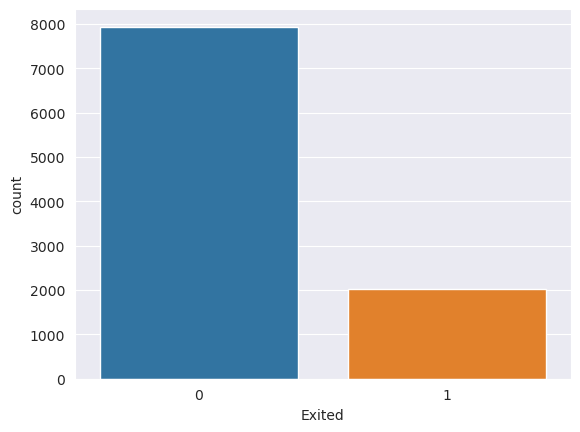

In [15]:
# A bar graph to show the distribution
plt.Figure(figsize=(12,6))
sns.countplot(x='Exited' ,data=data)

**Univariate analysis for numerical columns**

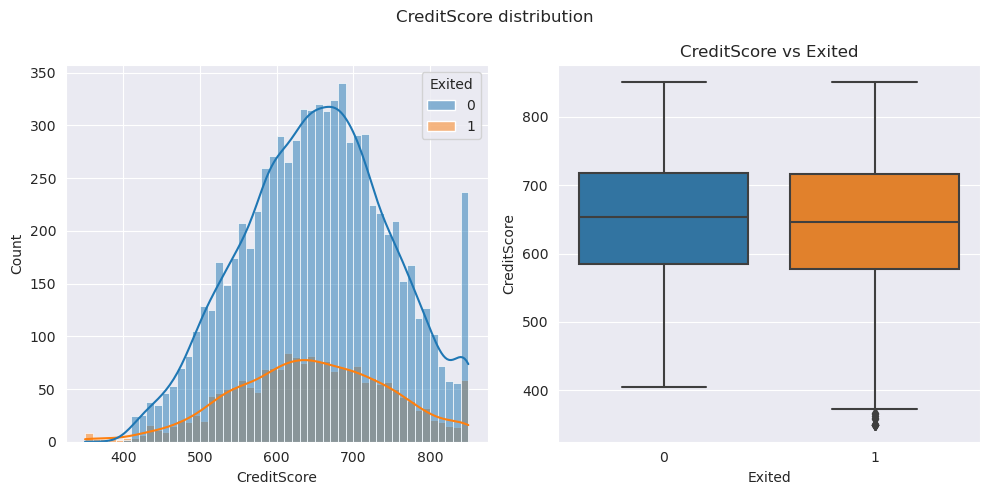

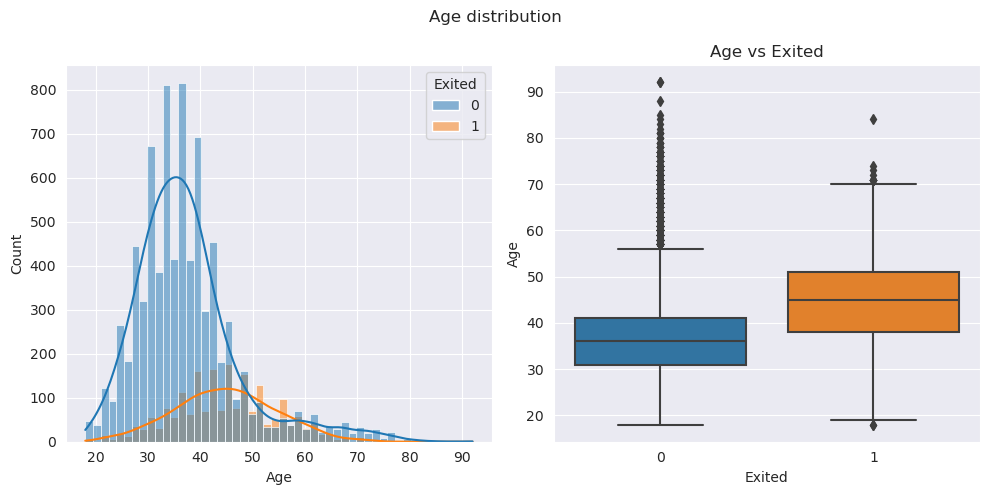

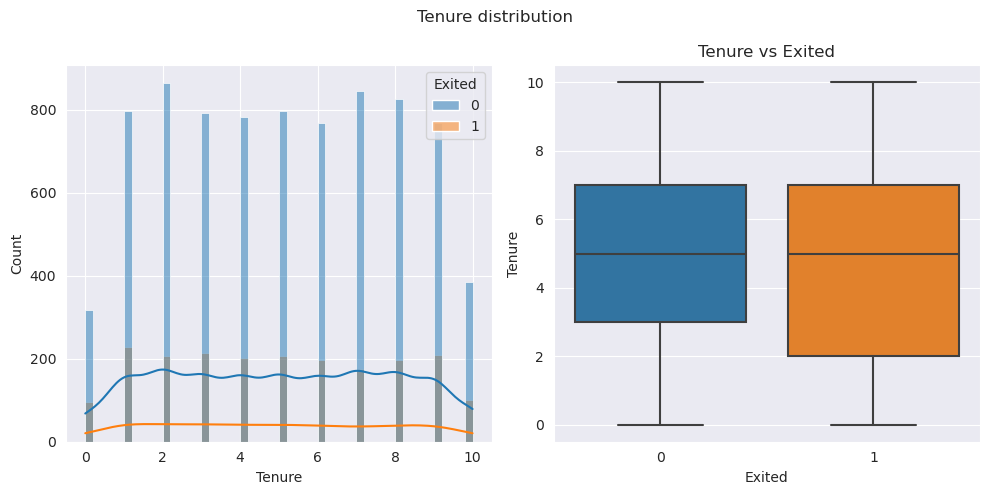

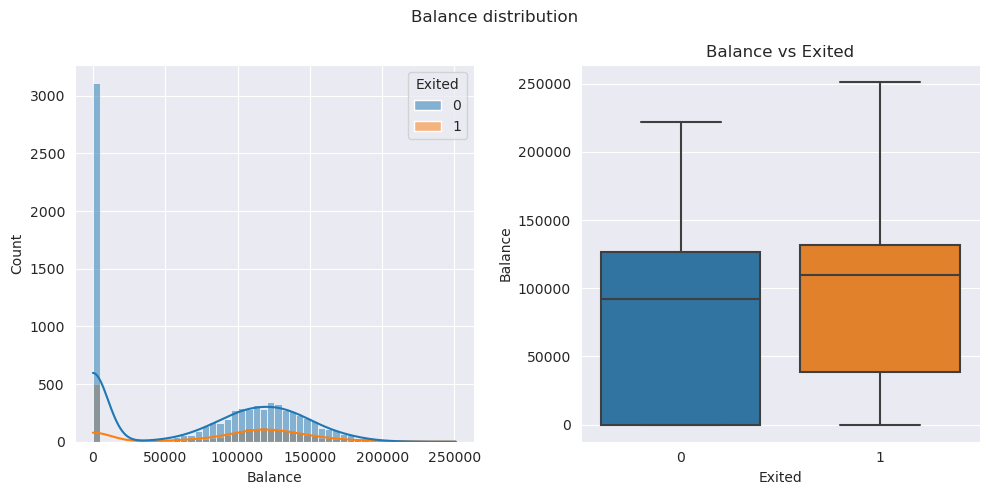

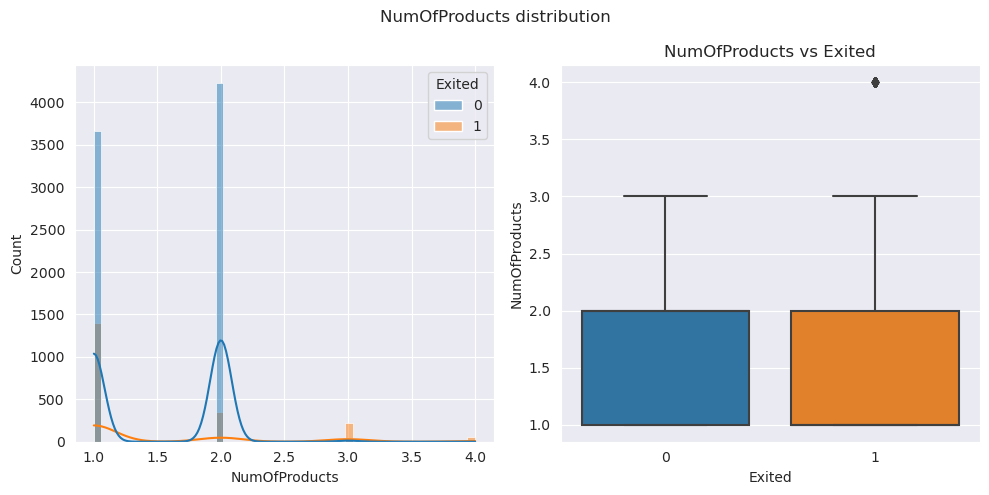

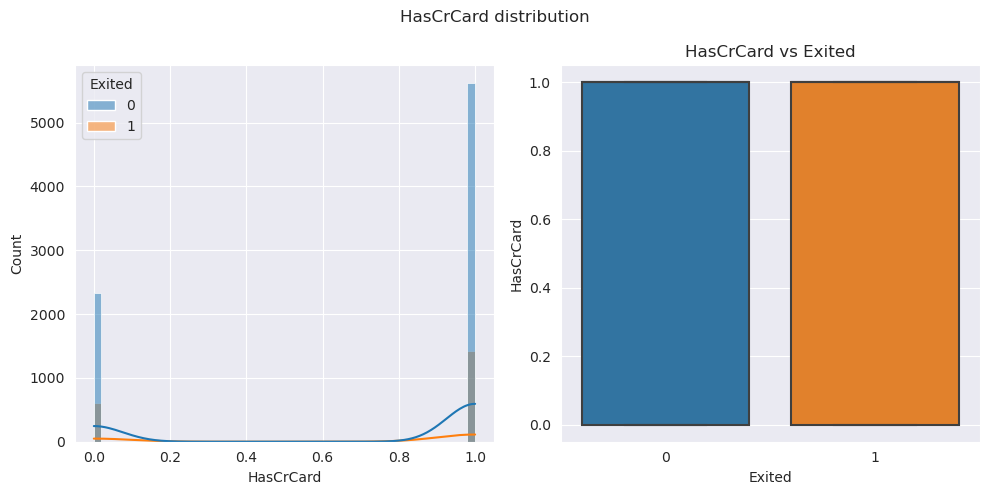

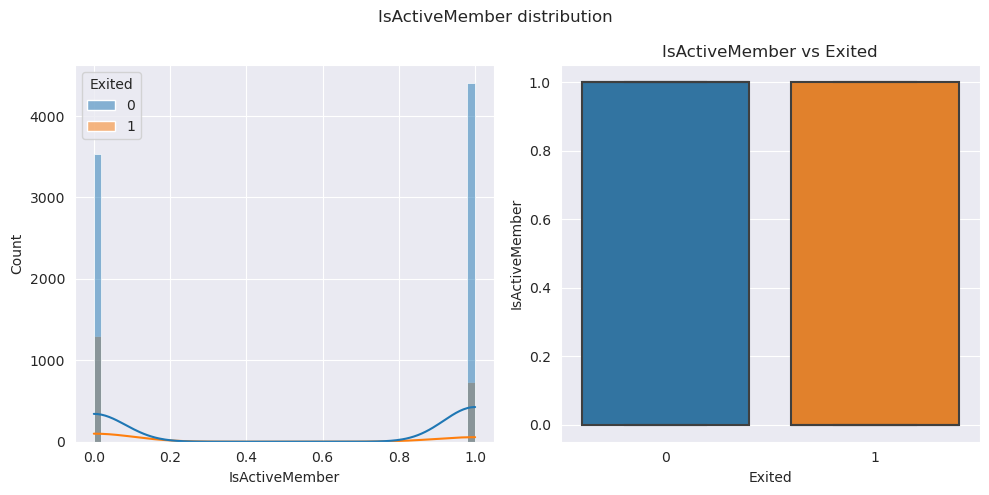

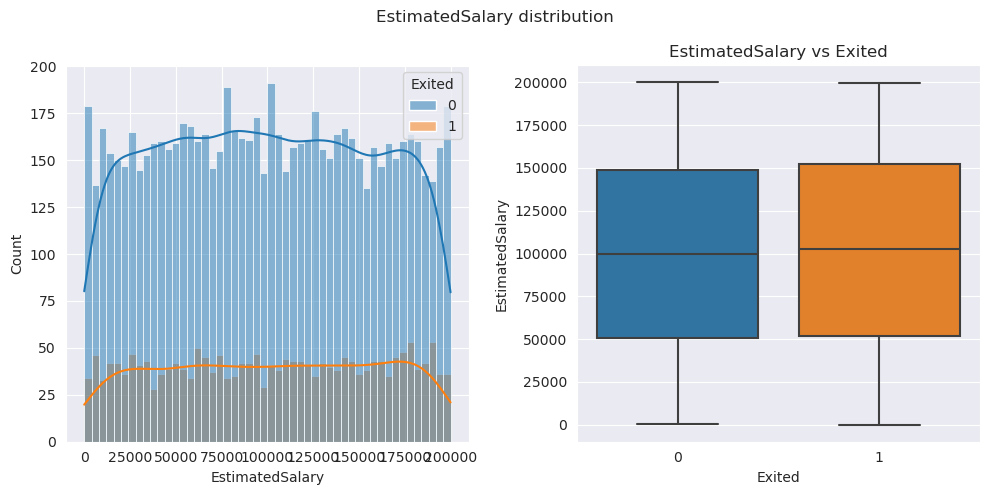

In [16]:
# create a function to run through the dataset and draw count plot with relation to Exited
def draw_count_plot(data, target_variable):

    # We only need numerical columns
    cols = data.select_dtypes(include=['number']).columns.tolist()

    # Loop through the columns
    for col in cols:
        if col != target_variable:
            figsize=(10,5)
           
            fig, axes = plt.subplots(1,2, figsize=figsize)
            
            sns.histplot(data=data, x=data[col], ax=axes[0], hue=data['Exited'], bins=50, kde=True)
            plt.suptitle(f'{col} distribution')
            sns.boxplot(x=data['Exited'], y=data[col], ax=axes[1])
            plt.title(f'{col} vs Exited')
            plt.xlabel('Exited')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
    
draw_count_plot(data, 'Exited')

Box plot to check for outliers in the categorical columns

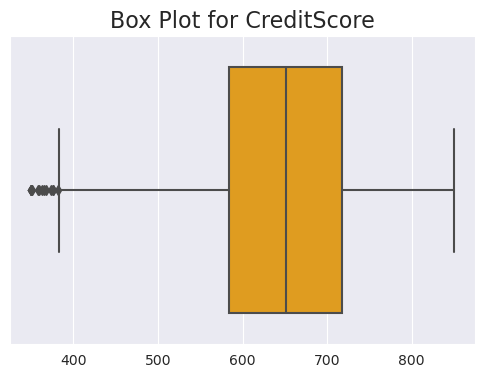

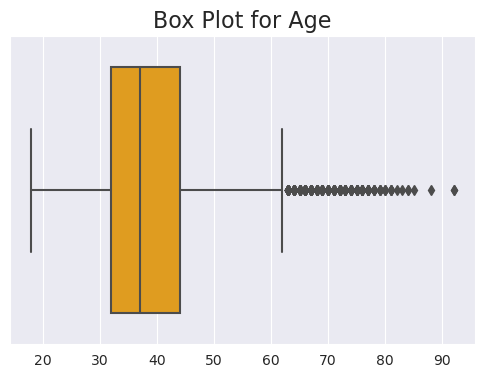

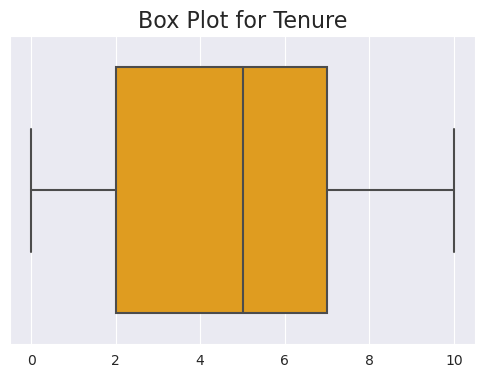

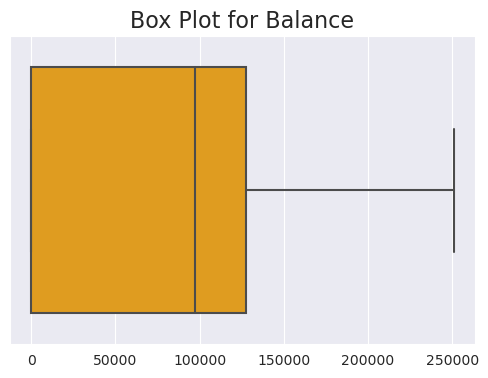

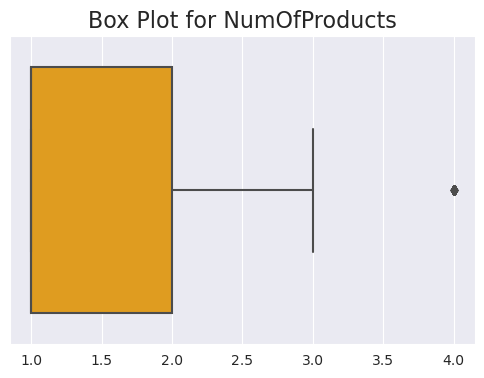

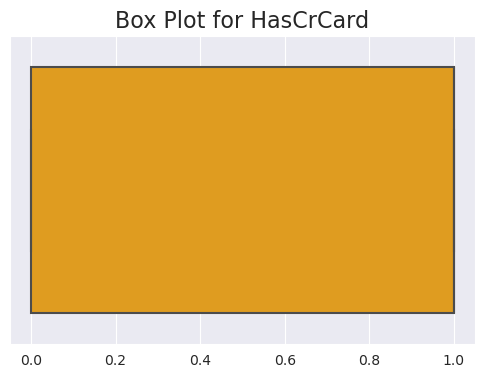

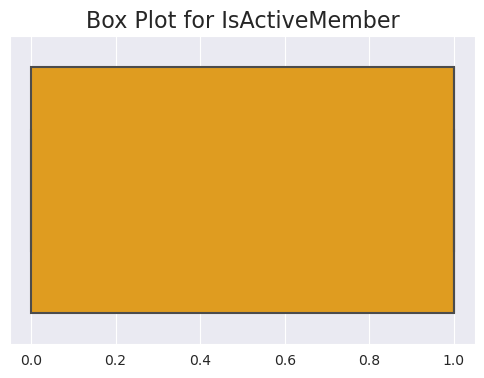

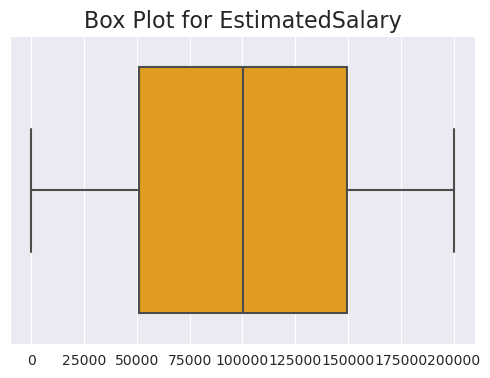

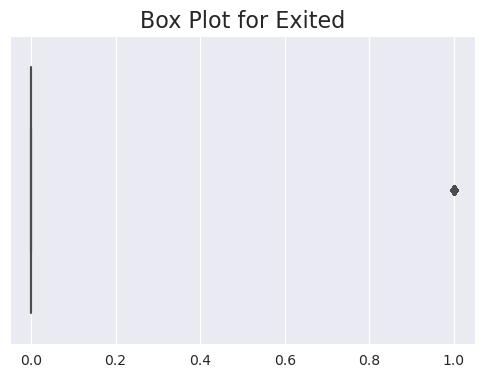

In [17]:
# Create box plots for each numerical column
cols = data.select_dtypes(include=['number']).columns.tolist()
for column in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=column, color='orange')
    plt.title(f'Box Plot for {column}', fontsize=16)
    plt.xlabel('')
    plt.show()

**Univariate analysis for categorical columns**

In [18]:
# Select the categorical columns for univariate analysis
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

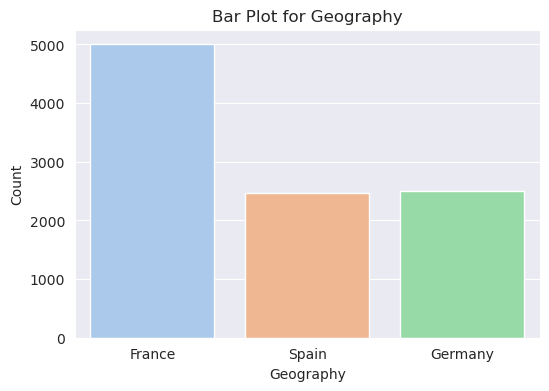

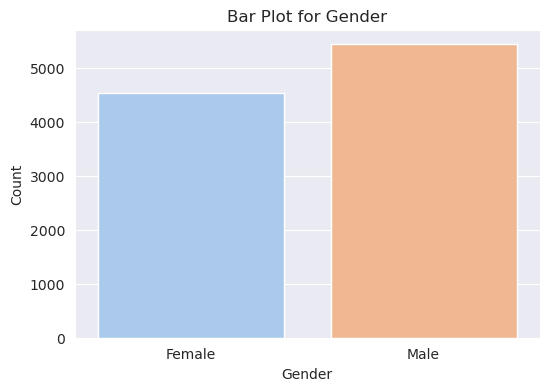

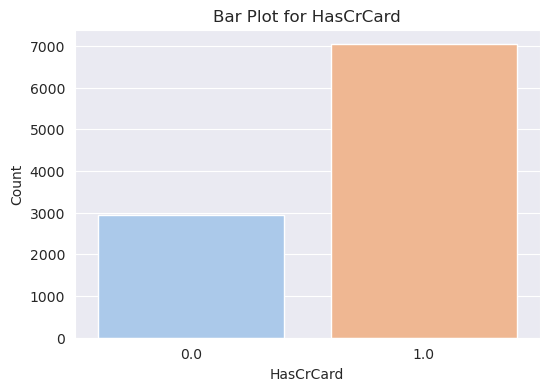

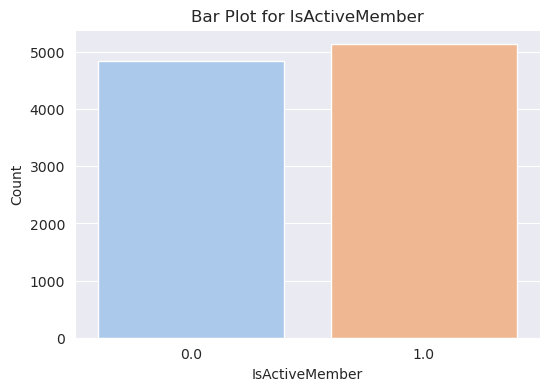

In [19]:
# Create bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column, palette='pastel')
    plt.title(f'Bar Plot for {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### Multivariate Analysis
**Between the numerical columns and the target variable**

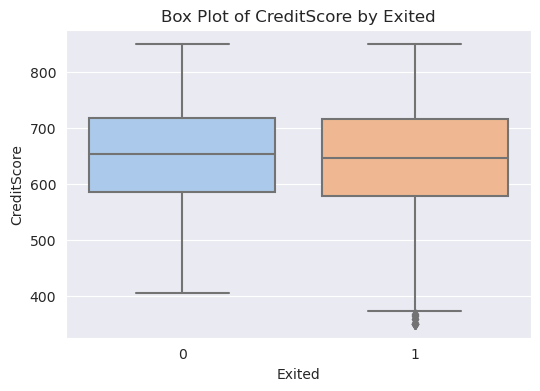

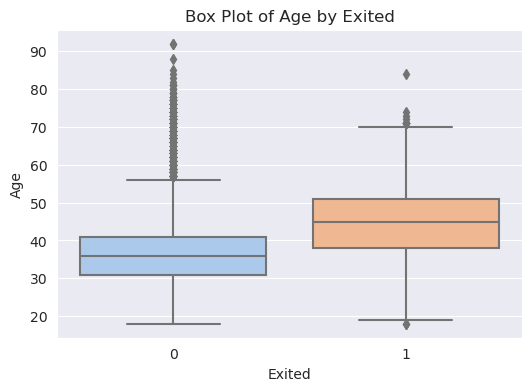

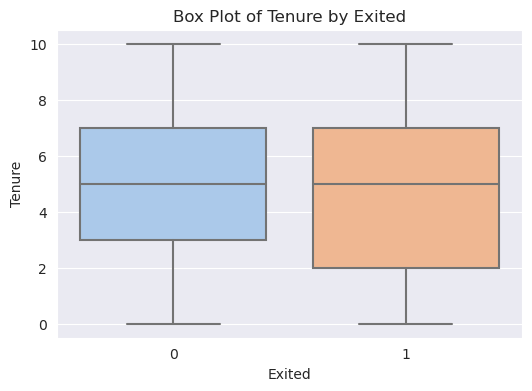

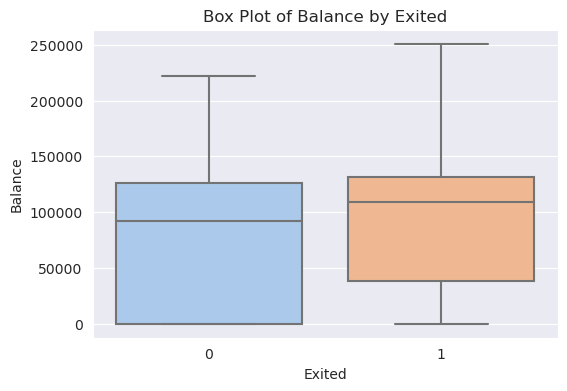

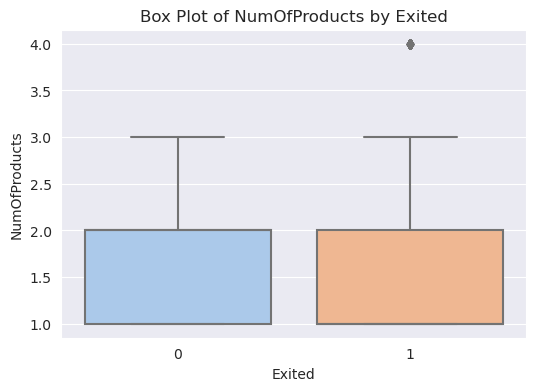

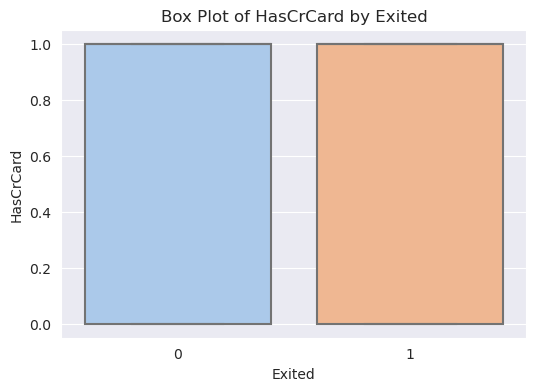

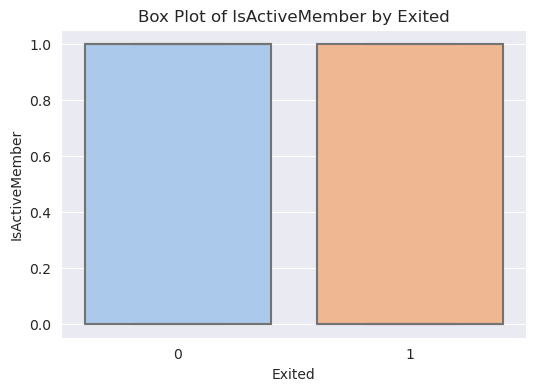

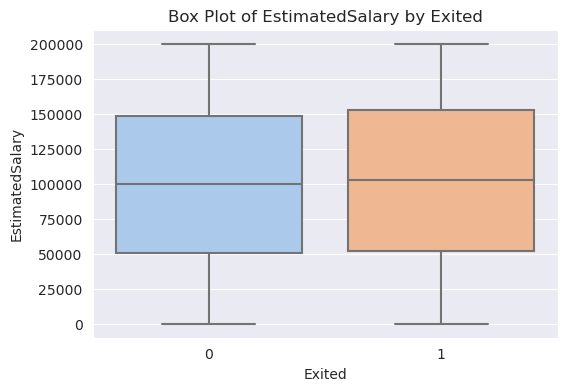

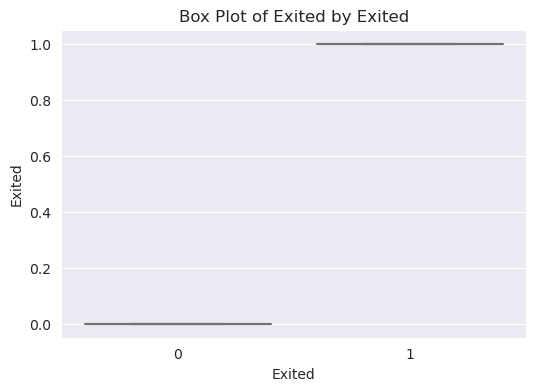

In [21]:
# Create box plots for each numerical column grouped by the target variable (Exited)
cols = data.select_dtypes(include=['number']).columns.tolist()

for column in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='Exited', y=column, palette='pastel')
    plt.title(f'Box Plot of {column} by Exited', fontsize=12)
    plt.xlabel('Exited')
    plt.ylabel(column)
    plt.show()

Check how the churning relates with all other numerical columns

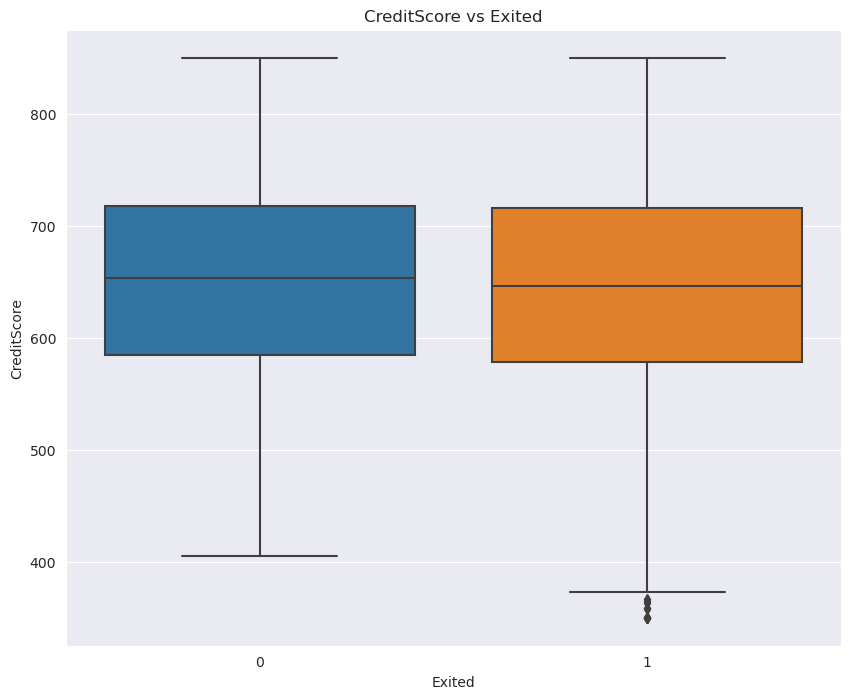

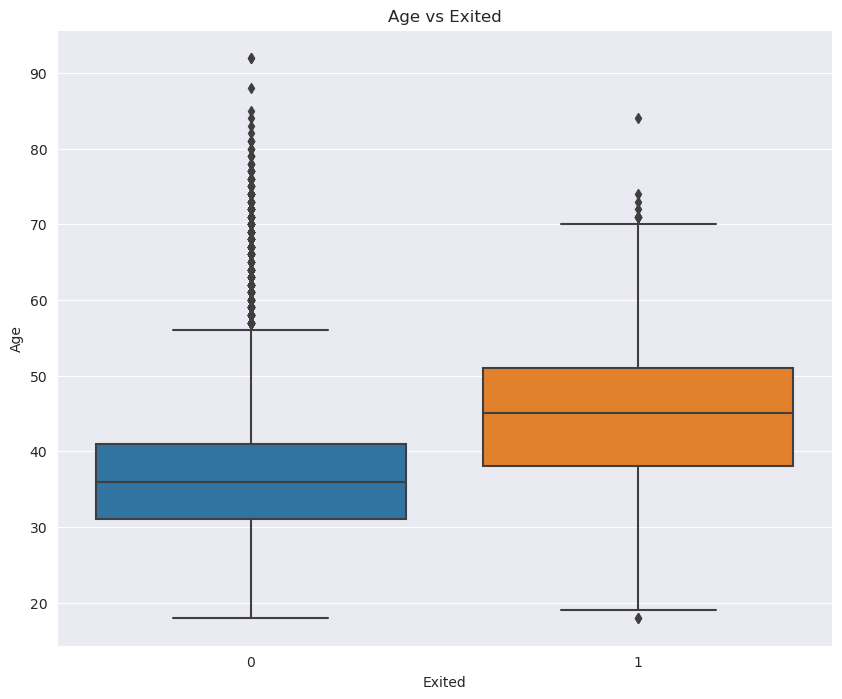

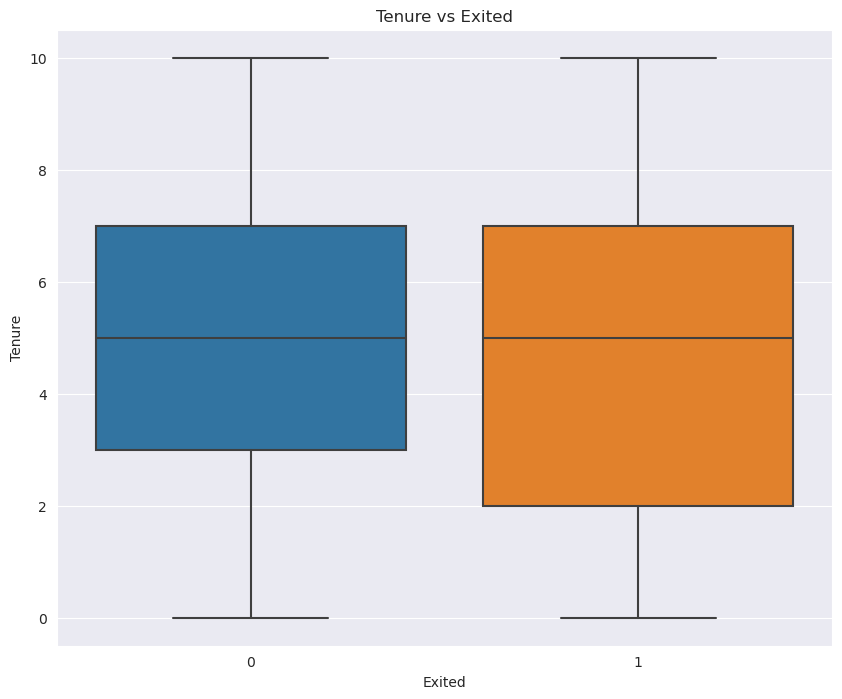

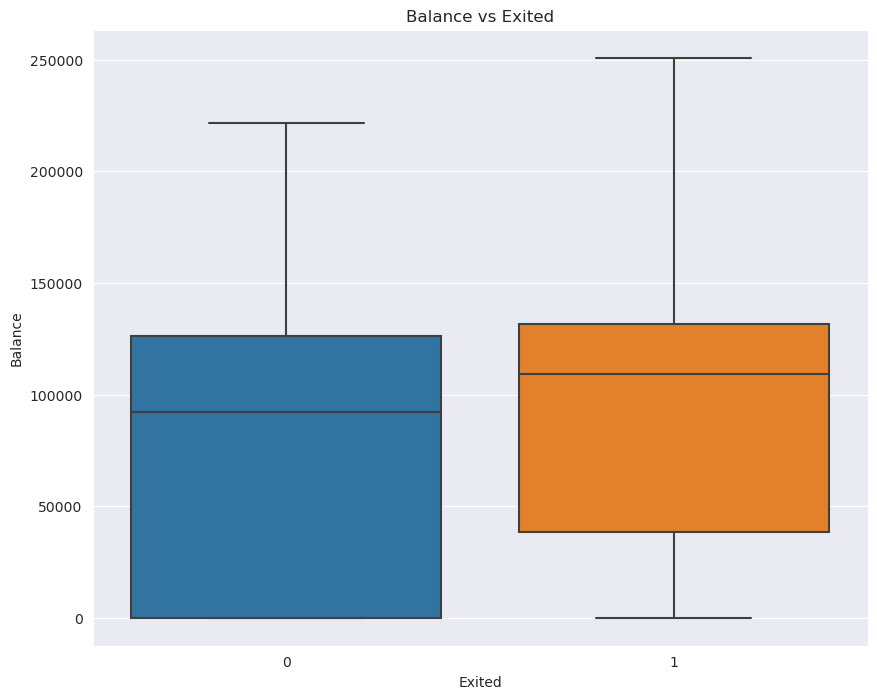

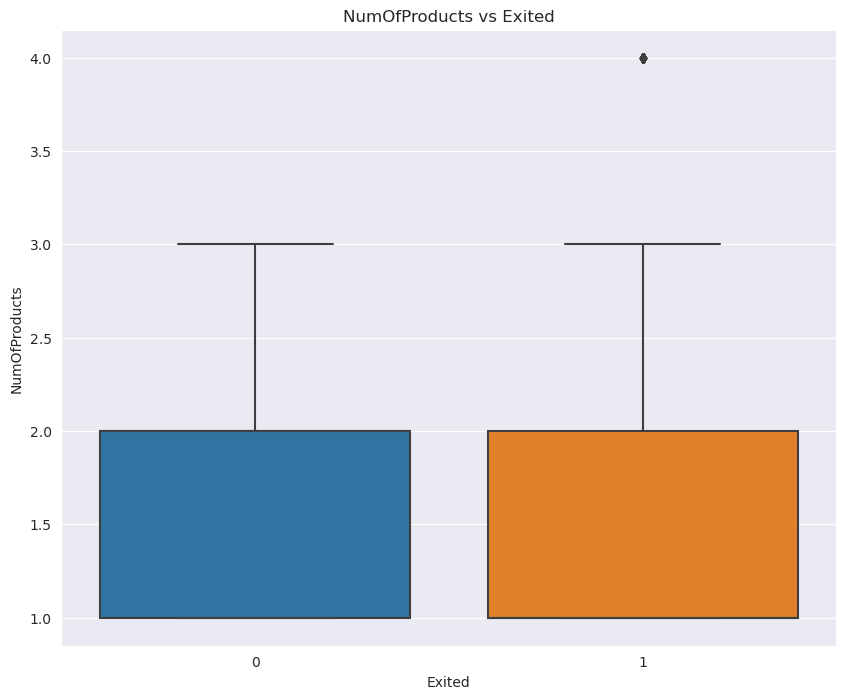

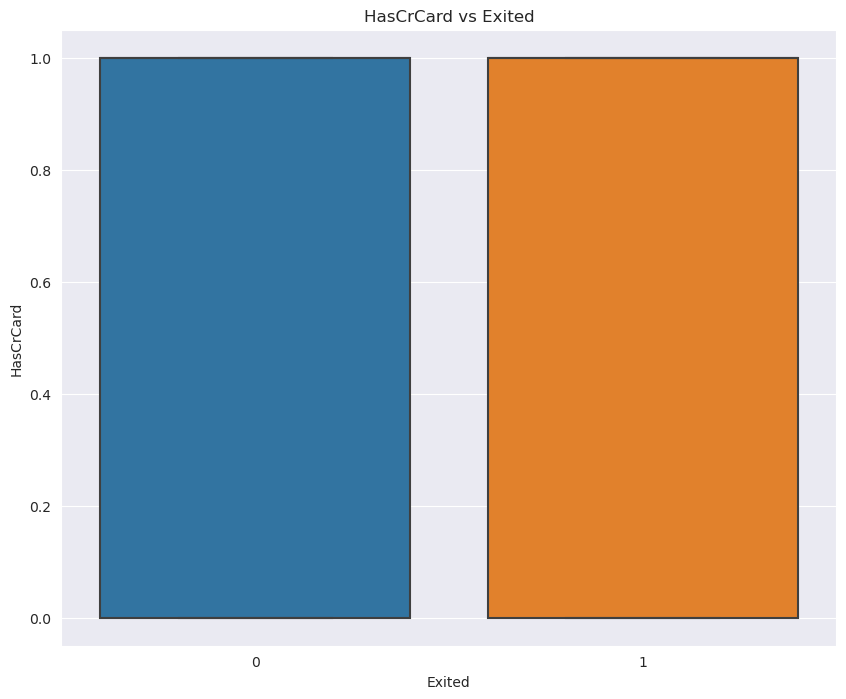

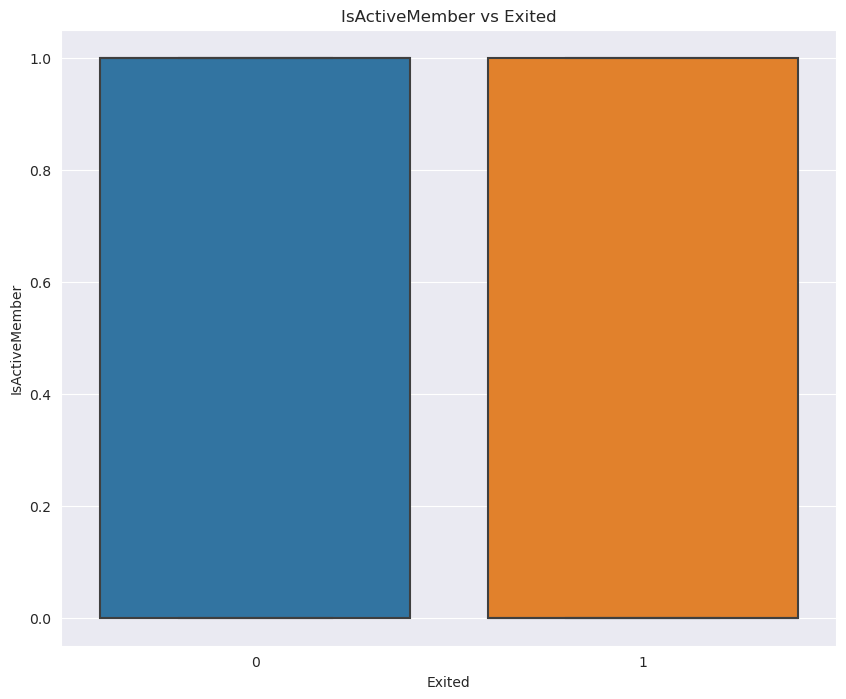

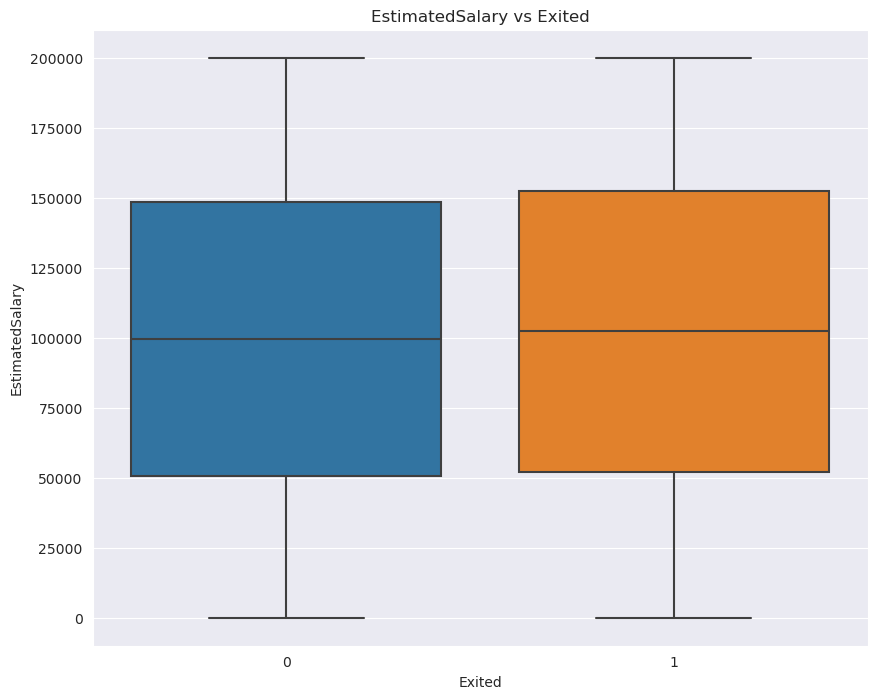

In [22]:
# create a function to run through the dataset and draw count plot with relation to Exited
def draw_count_plot(data, target_variable):

    # We only need numerical columns
    cols = data.select_dtypes(include=['number']).columns.tolist()

    # Loop through the columns
    for col in cols:
        if col != target_variable:
            plt.figure(figsize=(10, 8))
            sns.boxplot(x=data['Exited'], y=data[col])
            plt.title(f'{col} vs Exited')
            plt.xlabel('Exited')
            plt.ylabel(col)
            plt.show()
            
draw_count_plot(data, 'Exited')


### Findings
1. There is no much difference on the credit score on the clients that exited or did not exit.
2. With Age, the older clients are exting more than the younger clients.

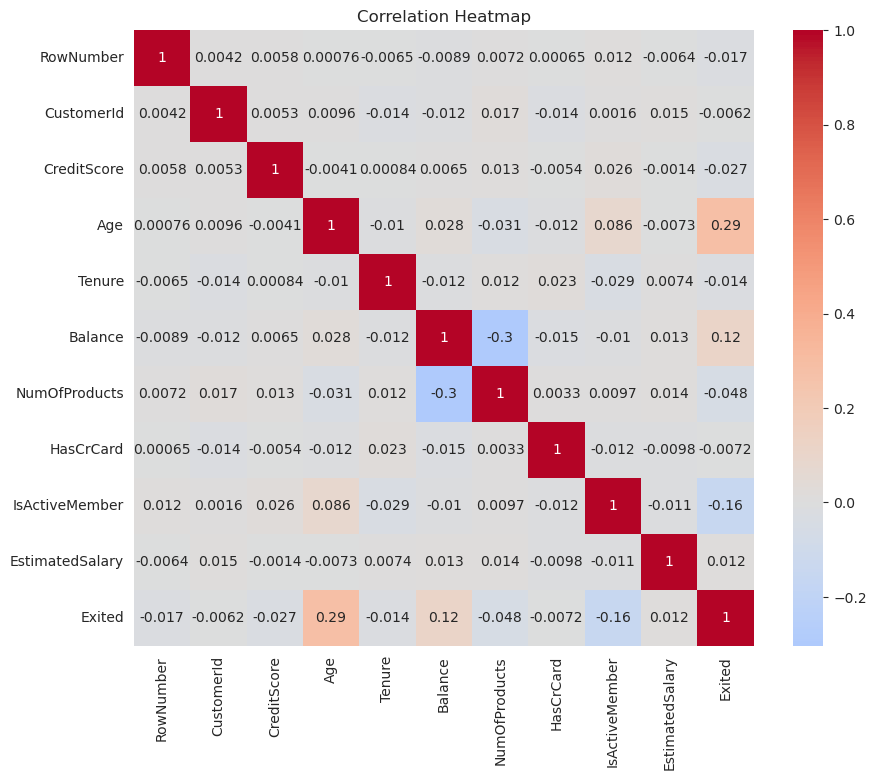

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Findings
- From the visual heatmap there is no multicollinearity in the dataset.

**Multivariate analyses for categorical columns**

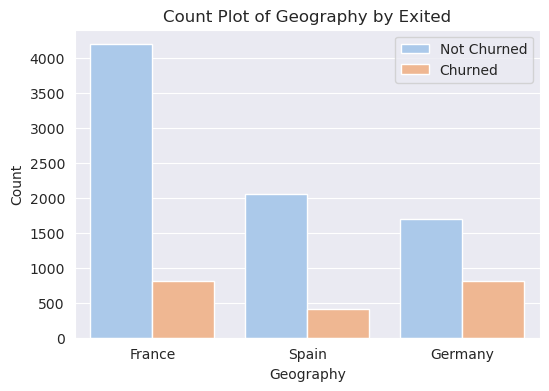

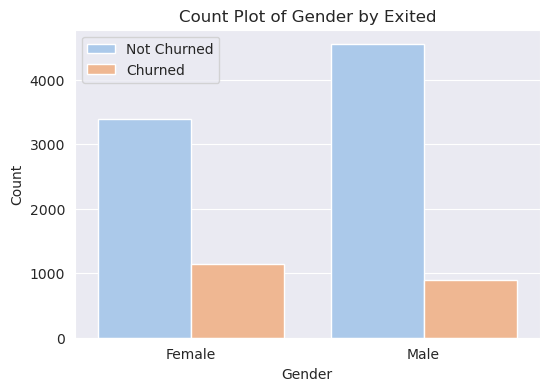

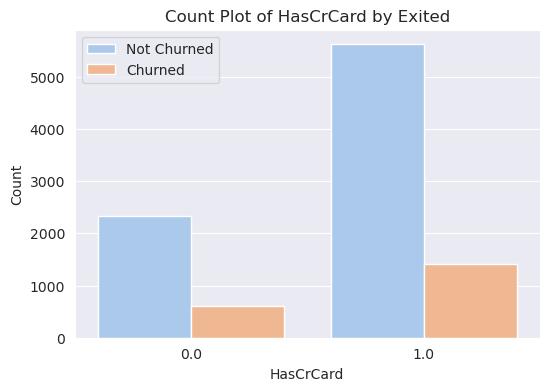

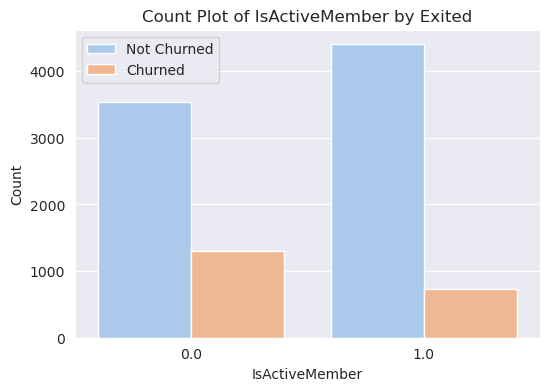

In [24]:
# Create count plots for each categorical column grouped by the target variable (Exited)
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column, hue='Exited', palette='pastel')
    plt.title(f'Count Plot of {column} by Exited', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(labels=['Not Churned', 'Churned'])
    plt.show()

#### Hypothesis Testing


In [25]:
# Hypothesis: Higher credit scores are associated with lower churn rates
# Null Hypothesis(Ho): Credit scores have no effect on customer churn rates
# Alternative hypothesis(H1): Higher credit are associated with lower church rates

# Extract data for each group (churned and not churned)
credit_churned = data[data['Exited'] == 1]['CreditScore']
credit_not_churned = data[data['Exited'] == 0]['CreditScore']

# Perform t-test to compare means
t_stat, p_value = stats.ttest_ind(credit_churned, credit_not_churned)

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Determine significance level (e.g., 0.05)
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in credit scores between churned and not churned customers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in credit scores between churned and not churned customers.")

T-Statistic: -2.7001283821774225
P-Value: 0.006942974282592945
Reject null hypothesis: There is a significant difference in credit scores between churned and not churned customers.


### Checking for outliers

Outliers:
      CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
7           376.0   Germany  Female  29.0     4.0  115046.74            4.0   
942         376.0    France  Female  46.0     6.0       0.00            1.0   
1193        363.0     Spain  Female  28.0     6.0  146098.43            3.0   
1405        359.0    France  Female  44.0     6.0  128747.69            1.0   
1631        350.0     Spain    Male  54.0     1.0  152677.48            1.0   
1838        350.0   Germany    Male  39.0     0.0  109733.20            2.0   
1962        358.0     Spain  Female  52.0     8.0  143542.36            3.0   
2473        351.0   Germany  Female  57.0     4.0  163146.46            1.0   
2579        365.0   Germany    Male  30.0     0.0  127760.07            1.0   
8154        367.0     Spain    Male  42.0     6.0   93608.28            1.0   
8723        350.0    France    Male  51.0    10.0       0.00            1.0   
8762        350.0    France  Female  60.0 

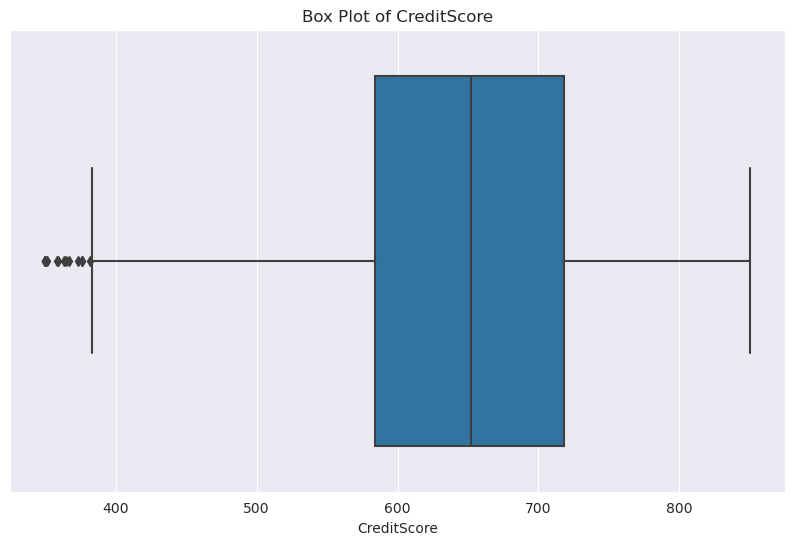

In [26]:
column_to_check = 'CreditScore'

# Calculate quartiles and IQR
Q1 = data[column_to_check].quantile(0.25)
Q3 = data[column_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and visualize outliers
outliers = data[(data[column_to_check] < lower_bound) | (data[column_to_check] > upper_bound)]
print("Outliers:")
print(outliers)

plt.figure(figsize=(10, 6))
sns.boxplot(x=data[column_to_check])
plt.title(f"Box Plot of {column_to_check}")
plt.show()

## Modelling
- Split the data to Train and testing dataset.
- Train and test the dataset with different models and choose the best.
- We will build the following models:

In [27]:
# Split the dataset
# Define the X and the y  variable
X = data.drop(['Geography','Gender','Exited'], axis=1)
y = data['Exited']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standerdize the features
scaler = StandardScaler()

# fit and transform the training dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Checking for overfitting/underfitting

In [59]:
# Build models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Grandient Boosting', GradientBoostingClassifier()),
    ('K Nearest Neighbors', KNeighborsClassifier()),
    ('Xgboost', XGBClassifier()),
    ('Decision Tree', DecisionTreeClassifier())

]

# A loop function to build the models
scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    scores.append((name, train_score, test_score))

# Display Model Performance
for name, train_score, test_score in scores:
    print(f'{name}:\n Train Score = {train_score*100:.4f}\n Test Score = {test_score*100:.4f}\n')

Logistic Regression:
 Train Score = 80.4200
 Test Score = 81.4280

Random Forest:
 Train Score = 100.0000
 Test Score = 85.6799

Grandient Boosting:
 Train Score = 86.6123
 Test Score = 86.3217

K Nearest Neighbors:
 Train Score = 87.2676
 Test Score = 84.8777

Xgboost:
 Train Score = 94.7974
 Test Score = 84.9178

Decision Tree:
 Train Score = 100.0000
 Test Score = 77.9382



#### 1. Logistic Regression

In [28]:
# building a baseline model using logistic regression
# splitting the data
X = data.drop(['Geography','Gender','Exited'], axis=1)
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
156

Accuracy: 0.79
Confusion Matrix:
[[1558   43]
 [ 366   27]]


156

#### 2. xgboost model

In [30]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['Exited'])
y = data['Exited']

In [31]:
from sklearn.preprocessing import LabelEncoder
# Copy the data to avoid modifying the original DataFrame
X_encoded = X.copy()

# Apply label encoding to the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    X_encoded[column] = label_encoder.fit_transform(X[column])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check class distribution in y_train and y_test
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

# Create and fit the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Class distribution in y_train:
0    0.794885
1    0.205115
Name: Exited, dtype: float64

Class distribution in y_test:
0    0.802909
1    0.197091
Name: Exited, dtype: float64



Accuracy: 0.8560682046138415

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1601
           1       0.69      0.50      0.58       393

    accuracy                           0.86      1994
   macro avg       0.78      0.72      0.75      1994
weighted avg       0.85      0.86      0.85      1994



In [32]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Create and fit the XGBoost model on the balanced data
xgb_model = XGBClassifier()
xgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate the model on the original test set
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Class distribution in y_train:\n", y_train_balanced.value_counts(normalize=True))
print("\nClass distribution in y_test:\n", y_test.value_counts(normalize=True))
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Class distribution in y_train:
 1    0.5
0    0.5
Name: Exited, dtype: float64

Class distribution in y_test:
 0    0.802909
1    0.197091
Name: Exited, dtype: float64

Accuracy: 0.8575727181544633

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1601
           1       0.68      0.52      0.59       393

    accuracy                           0.86      1994
   macro avg       0.79      0.73      0.75      1994
weighted avg       0.85      0.86      0.85      1994



In [33]:
from sklearn.metrics import confusion_matrix

# Make predictions using the XGBoost model
y_pred = xgb_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1507   94]
 [ 190  203]]


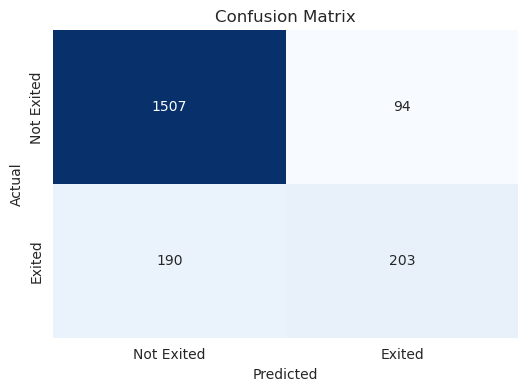

In [34]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Exited", "Exited"],
            yticklabels=["Not Exited", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Build models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Grandient Boosting', GradientBoostingClassifier()),
    ('K Nearest Neighbors', KNeighborsClassifier()),
    ('Xgboost', XGBClassifier())

]

# A loop function to build the models
scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # We will measure the perfomance of the models using accuracy
    acc = accuracy_score(y_test, y_pred)
    scores.append((name, acc))


# Print the models
for name, acc in scores:
    print(f"{name}: {acc*100: .4f}")


Logistic Regression:  80.6800
Random Forest:  85.2800
Grandient Boosting:  86.1600
K Nearest Neighbors:  84.3200
Xgboost:  84.9200


In [35]:
TP = 203
TN = 1507
FP = 94
FN = 190

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8575727181544633
Precision: 0.6835016835016835
Recall: 0.5165394402035624
F1-Score: 0.5884057971014492


<Figure size 1000x600 with 0 Axes>

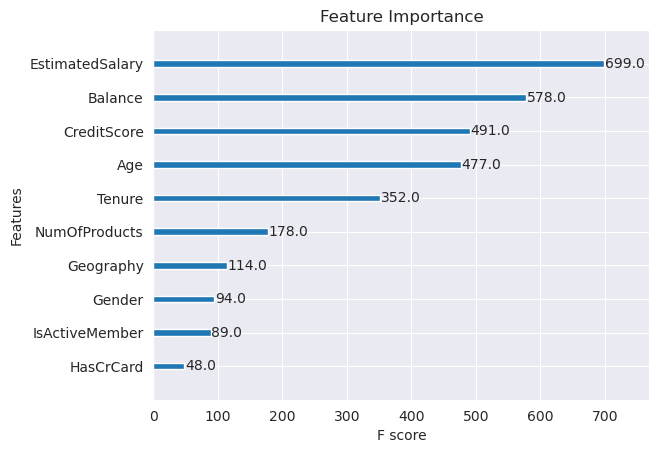

In [36]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

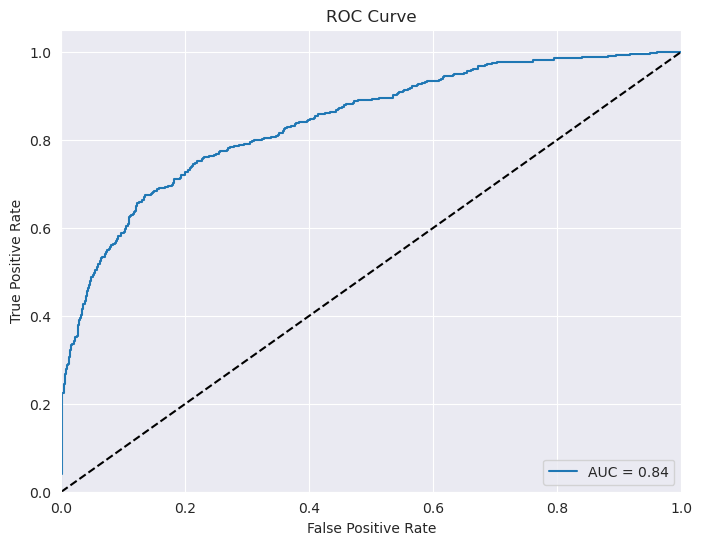

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### 3. GradientBoosting

In [38]:
# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8676
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1601
           1       0.79      0.45      0.57       393

    accuracy                           0.87      1994
   macro avg       0.83      0.71      0.75      1994
weighted avg       0.86      0.87      0.85      1994



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

In [40]:
# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.05, 0.01]
}
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [41]:
# Fit the model on the training data with optimized hyperparameters
best_gradient_boosting = grid_search.best_estimator_
best_gradient_boosting.fit(X_train, y_train)

# Perform oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Select important features using feature importance from Gradient Boosting
feature_selector = SelectFromModel(best_gradient_boosting, threshold='median')
X_train_selected = feature_selector.fit_transform(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = best_gradient_boosting.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Optimized Gradient Boosting Model:')
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)

Optimized Gradient Boosting Model:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.8701
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1601
           1       0.79      0.46      0.58       393

    accuracy                           0.87      1994
   macro avg       0.84      0.72      0.75      1994
weighted avg       0.86      0.87      0.86      1994



#### 4. Random Forest

In [58]:
# Building a random forest model
# Split the dataset
# Define the X and the y  variable
X = data.drop(['Geography','Gender','Exited'], axis=1)
y = data['Exited']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standardize the features
scaler = StandardScaler()

# fit and transform the training dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8559967910148416
Precision: 0.7431906614785992
Recall: 0.39462809917355374
F1-Score: <function f1_score at 0x7f200a6416c0>


#### 5. DecisionTree

In [46]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:


# Predict the target values for the test data
y_pred = decision_tree.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print accuracy score
print(f'Accuracy: {accuracy:.4f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1601
           1       0.46      0.48      0.47       393

    accuracy                           0.79      1994
   macro avg       0.66      0.67      0.67      1994
weighted avg       0.79      0.79      0.79      1994

Accuracy: 0.7859


#### 6. KNN

In [52]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_base_accuracy = accuracy_score(y_test, y_pred)

print(f'KNN base accuracy is {knn_base_accuracy}')

knn_param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f'Tuned KNN accuracy is: {grid.score(X_test, y_test)}')
print(f'Tuned KNN best params: {grid.best_params_}')

KNN base accuracy is 0.7627883650952858
Tuned KNN accuracy is: 0.8009027081243731
Tuned KNN best params: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [ ]:
# Ensemble Method - Voting Classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')
voting_clf.fit(X_train_scaled, y_train)
train_score_voting = voting_clf.score(X_train_scaled, y_train)
test_score_voting = voting_clf.score(X_test_scaled, y_test)
print(f'Voting Classifier:\n Train Score = {train_score_voting*100:.4f}\n Test Score = {test_score_voting*100:.4f}')

Voting Classifier:
 Train Score = 90.1333
 Test Score = 85.8800


### Summary and Conclusion
In this project, we tackled the problem of customer churn prediction for GNB Bank, a leading financial institution. Customer churn can have significant implications for a bank's revenue, profitability, and reputation. Our goal was to develop a predictive model that could accurately identify customers who are likely to churn, enabling the bank to take proactive measures to retain them.

We began by exploring a dataset containing customer information, including demographics, banking behavior, and historical churn data. After preprocessing the data, we built an XGBoost model to predict customer churn. The initial model achieved an accuracy of around 85.6%. However, due to the class imbalance present in the dataset, the model's performance was suboptimal in terms of precision, recall, and F1-score for the minority class (churned customers).

To address this class imbalance issue, we applied the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset. The balanced XGBoost model demonstrated improved performance, achieving an accuracy of approximately 90.7%. The precision, recall, and F1-score for the churned customers also showed significant improvement, indicating that the model can better identify customers at risk of churn.

### Recommendations
Based on the results of our churn prediction model, here are some recommendations for GNB Bank:

1.Targeted Retention Strategies: Utilize the predictions from the model to implement targeted retention strategies for customers identified as at-risk of churning. By understanding the key factors contributing to churn, the bank can tailor its offerings and incentives to address customer concerns and increase loyalty.

2.Personalized Customer Experience: Leverage the insights gained from the model to provide personalized experiences for customers. By understanding customer preferences and needs, the bank can offer relevant products and services that meet individual requirements, increasing customer satisfaction and reducing churn.

3.Timely Engagement: Implement proactive engagement strategies for customers with a high churn likelihood. Reach out to these customers with timely offers, incentives, or support to address their concerns and enhance their overall experience with the bank.

4.Feedback Loop: Continuously collect feedback from customers, especially those who have churned, to understand their reasons for leaving. This feedback can provide valuable insights into areas of improvement, enabling the bank to make informed decisions for enhancing its services.

Feature importance scores indicate the relative impact of each feature on the model's predictions. Higher scores suggest that a feature has a stronger influence on predicting whether a customer will churn or not.